<p style="margin-bottom:2em;"></p>

**EDA, Visualization and Predictive modelling and Customer Churn Analysis**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [26]:
df = pd.read_csv("Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploratory data analysis**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
# check for duplicate rows
df.duplicated().sum()

0

**Visualization**

**Histogram of Categorical x variables**

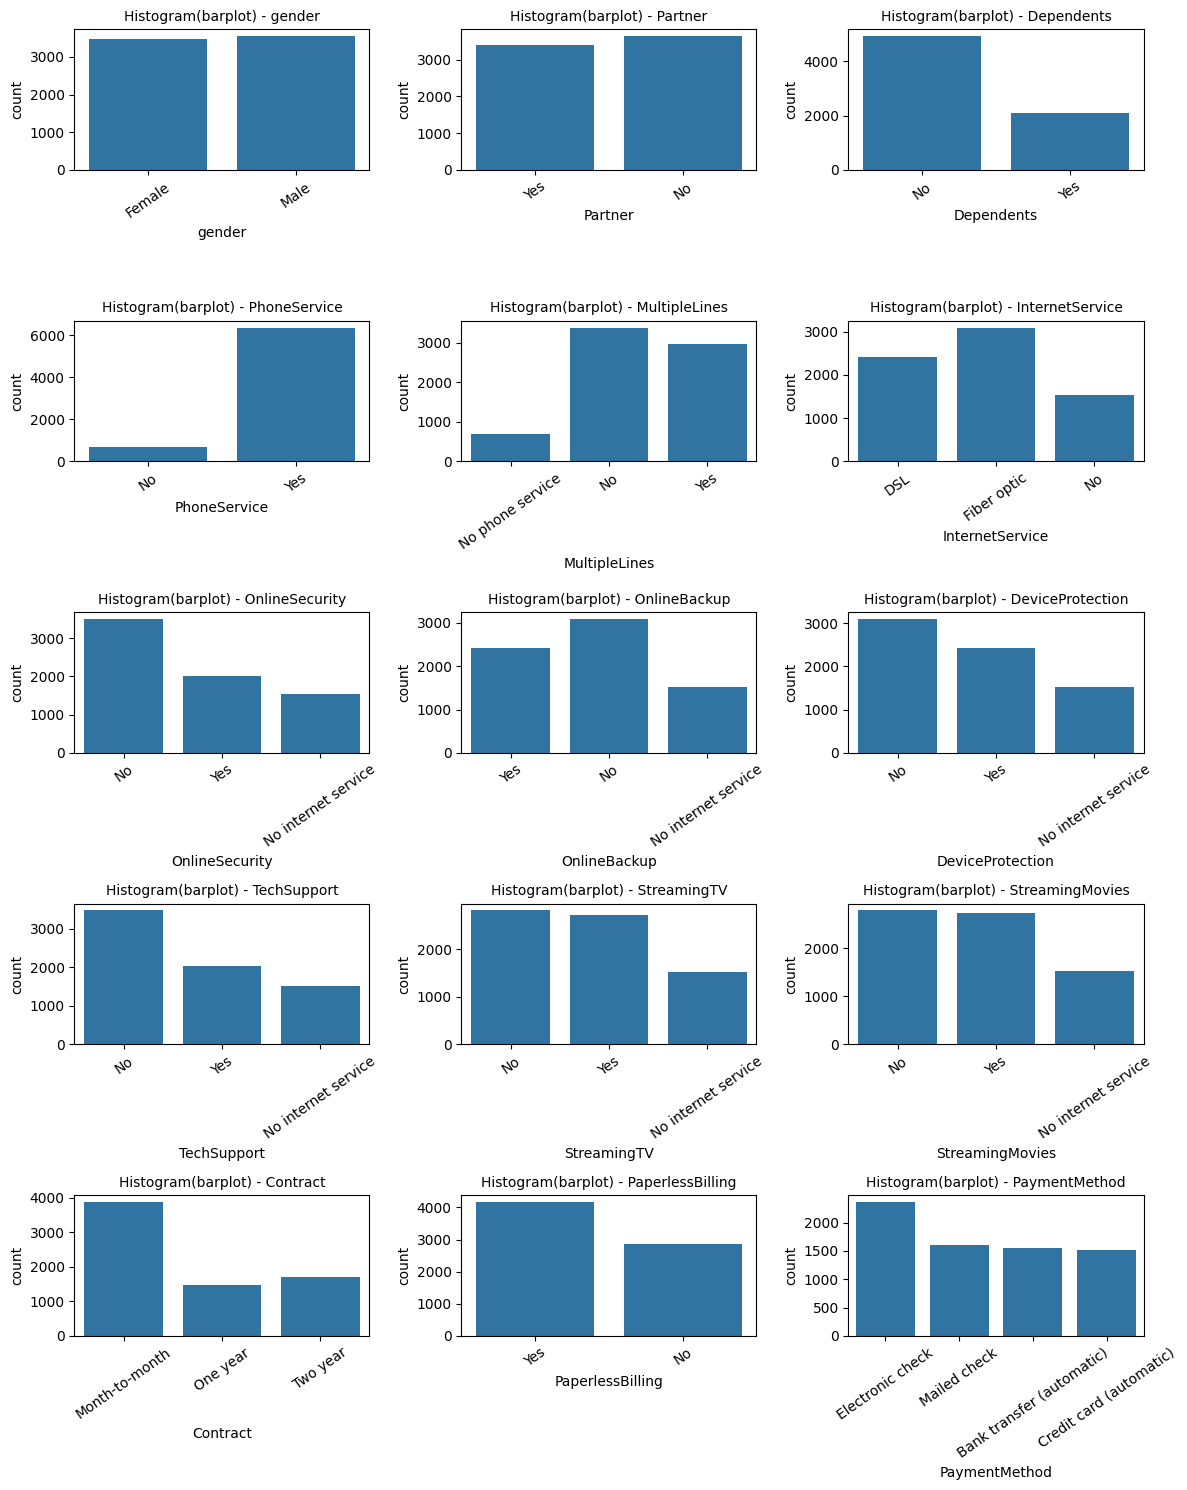

In [31]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))

for i, columns in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    sns.countplot(x=columns, data=df, ax = ax[row,col])
    ax[row, col].set_title(f'Histogram(barplot) - {columns}', fontsize=10)
    ax[row, col].tick_params(axis='x', rotation=35)

plt.tight_layout()
plt.show()


Histogram of Numeric x variables

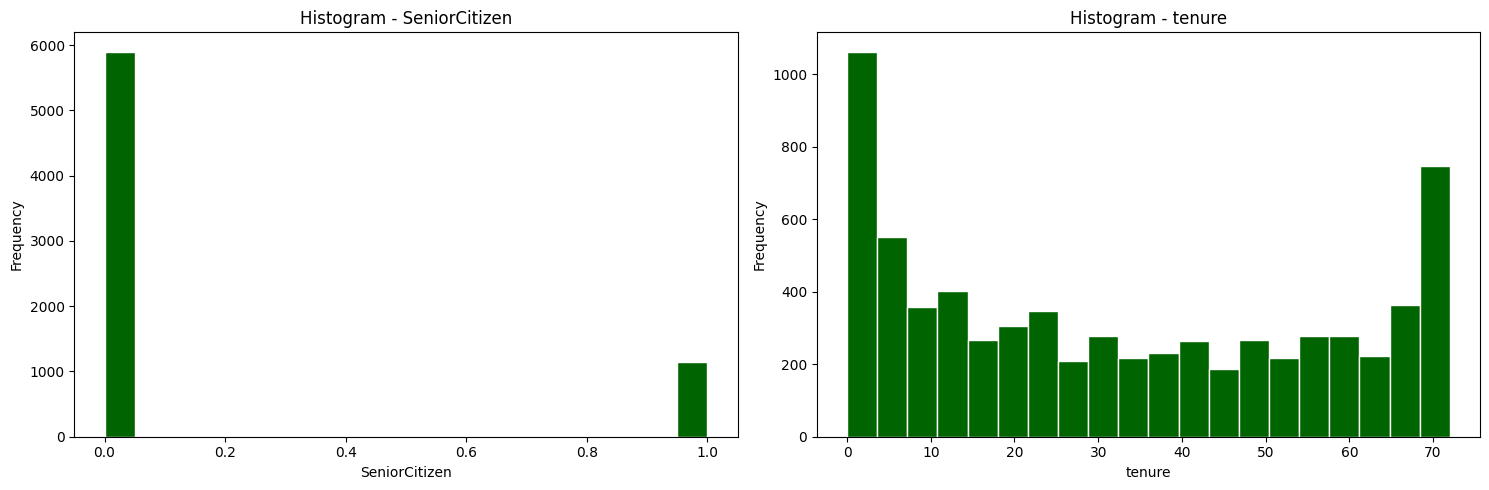

In [32]:
numeric_columns = ['SeniorCitizen', 'tenure']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, column in enumerate(numeric_columns):
    ax[i].hist(df[column], bins=20, edgecolor='white', color='darkgreen')
    ax[i].set_title(f'Histogram - {column}', fontsize=12)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Boxplot of other variables**

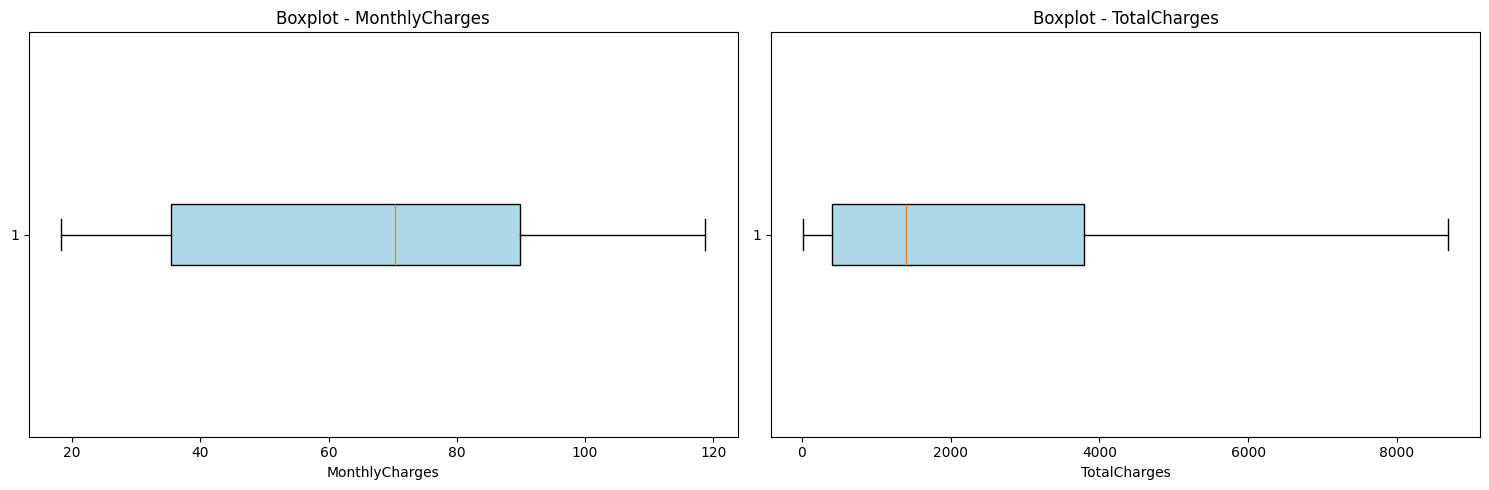

In [33]:
numeric_columns = ['MonthlyCharges', 'TotalCharges']

# TotalCharges had some null values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, column in enumerate(numeric_columns):
    ax[i].boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue')) 
    ax[i].set_title(f'Boxplot - {column}', fontsize=12)
    ax[i].set_xlabel(column)

plt.tight_layout()
plt.show()


**Correlation Matrix**

<Axes: >

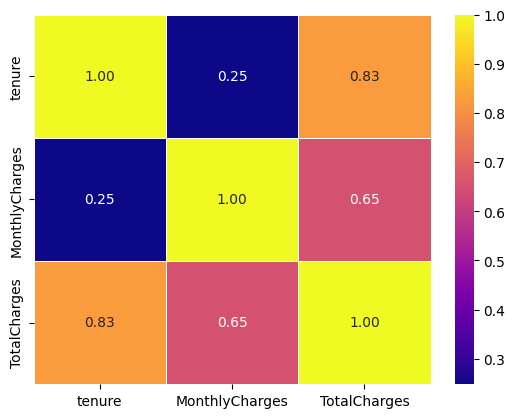

In [34]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df[num_columns].corr()

sns.heatmap(correlation_matrix, annot = True, cmap='plasma', fmt=".2f", linewidths=.5)

**Data Prep**

In [35]:
df_coded = df

In [36]:
# Convert Categorical columns to numeric
df_coded['MultipleLines'] = pd.factorize(df_coded['MultipleLines'])[0].astype(int)
df_coded['Contract'] = pd.factorize(df_coded['Contract'])[0].astype(int)
df_coded['PaymentMethod'] = pd.factorize(df_coded['PaymentMethod'])[0].astype(int)
df_coded['InternetService'] = pd.factorize(df_coded['InternetService'])[0].astype(int)
df_coded['OnlineSecurity'] = pd.factorize(df_coded['OnlineSecurity'])[0].astype(int)
df_coded['OnlineBackup'] = pd.factorize(df_coded['OnlineBackup'])[0].astype(int)
df_coded['DeviceProtection'] = pd.factorize(df_coded['DeviceProtection'])[0].astype(int)
df_coded['StreamingTV'] = pd.factorize(df_coded['StreamingTV'])[0].astype(int)
df_coded['StreamingMovies'] = pd.factorize(df_coded['StreamingMovies'])[0].astype(int)

In [37]:
# Convert Binary columns to numeric
df_coded['Churn'] = df_coded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df_coded['gender'] = df_coded['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_coded['Partner'] = df_coded['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df_coded['Dependents'] = df_coded['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df_coded['PaperlessBilling'] = df_coded['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df_coded['PhoneService'] = df_coded['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df_coded['TechSupport'] = df_coded['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'TotalCharges' to numeric, coerce errors to NaN
df_coded['TotalCharges'] = pd.to_numeric(df_coded['TotalCharges'], errors='coerce')

In [38]:
df_coded['TotalCharges'].fillna(df_coded['TotalCharges'].mean(), inplace=True)

In [39]:
df_coded = df_coded.drop(columns=['customerID'])

In [40]:
df_coded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,1,0,1,1,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,1,0,1,0,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,1,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,1,0,1,0,0,0,0,0,1,0,70.70,151.65,1


**Predicting Churn**

In [41]:
X = df_coded[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
              'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
              'MonthlyCharges', 'TotalCharges']]

# Add intercept term to the design matrix
X = sm.add_constant(X)

y = df_coded['Churn']

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.414587
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7023
Method:                           MLE   Df Model:                           19
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.2835
Time:                        19:02:28   Log-Likelihood:                -2919.9
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4004      0.198     -2.025      0.043      -0.788      -0.013
gender     

Find Probabilities using this Model

In [42]:
probabilities = result.predict(X)
df_coded['Churn_Probability'] = probabilities
df_coded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Probability
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,29.85,29.85,0,0.618905
1,1,0,0,0,34,1,1,0,1,1,...,0,0,0,1,0,1,56.95,1889.50,0,0.050020
2,1,0,0,0,2,1,1,0,1,0,...,0,0,0,0,1,1,53.85,108.15,1,0.315022
3,1,0,0,0,45,0,0,0,1,1,...,1,0,0,1,0,2,42.30,1840.75,0,0.030276
4,0,0,0,0,2,1,1,1,0,1,...,0,0,0,0,1,0,70.70,151.65,1,0.689992


**Check Accuracy of model**

In [43]:
df_coded['Churn_Probability_Predicted'] = (df_coded['Churn_Probability']>0.5).astype(int)

In [44]:
df_coded['Prediction_Accuracy'] = (df_coded['Churn'] == df_coded['Churn_Probability_Predicted']).astype(int)

In [45]:
accuracy = (df_coded['Prediction_Accuracy'].sum() / len(df_coded)) * 100

# Display the calculated accuracy
print(f'Accuracy with 0.5 threshold: {accuracy:.2f}%')

Accuracy with 0.5 threshold: 80.59%


In [46]:
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

**Now finding Accuracy with ML algorithm**

LogisticRegression

In [47]:
X = df_coded[['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
              'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = df_coded['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')


Accuracy: 82.19%


Decision Tree Classifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_DT = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_DT:.2%}')

Accuracy: 74.24%


**Thank You!**